In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
sns.set()

In [43]:
df_dados = pd.read_csv('dataframe-bsi-2009-2022.csv', sep=';')

# Filtros

Filtrando os dados da unidade 1.

In [44]:
filtro  = df_dados['unidade'] == 1
df_dados_filtrado = df_dados[filtro]
df_dados_filtrado

,discente,unidade,media_final,descricao,ano,id_componente,nome,sexo,ano_nascimento,ano_ingresso,status
0,afba64c0118bfcc8d5b3987e725ed545,1.0,"1,5",REPROVADO,20091,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,M,1987,2009,CANCELADO
3,9526e01da587b20211a39b4e66673aea,1.0,"9,2",APROVADO,20091,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,M,1990,2009,CONCLUÍDO
6,1ed6777bd6ff4fd393e0b334d519c642,1.0,"8,0",APROVADO,20091,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,M,1991,2009,CONCLUÍDO
9,cd66757ed4a317a3537ae3e246648778,1.0,"7,3",APROVADO,20091,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,M,1975,2009,CANCELADO
12,fa7b20f8ac2312976cd7338487ad527d,1.0,"9,8",APROVADO,20091,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,M,1978,2009,CONCLUÍDO
...,...,...,...,...,...,...,...,...,...,...,...
53189,7d2dd0d35ebb8319b0c0e612660d2c3a,1.0,"9,3",APROVADO,20222,62766,SISTEMAS DE APOIO À DECISÃO,M,2000,2019,CONCLUÍDO
53190,7d2dd0d35ebb8319b0c0e612660d2c3a,1.0,"9,8",APROVADO,20222,62764,PROGRAMAÇÃO VISUAL,M,2000,2019,CONCLUÍDO
53193,22f4aed4a073c5e9515a8669e9c102f3,1.0,"5,2",APROVADO POR NOTA,20222,62764,PROGRAMAÇÃO VISUAL,M,1984,2019,ATIVO - FORMANDO
53196,e10089f6080d3afa8904437086ea2752,1.0,"9,3",APROVADO,20222,2050107,DIREITO E LEGISLAÇÃO SOCIAL,M,2002,2019,ATIVO


Fazendo um recorte da nossa análise, vamos começar por disciplinas obrigatórias do Bacharelado em Sistemas da Informação (BSI):

In [45]:
lista_obrigatórias = [
                'ALGORITMOS E LÓGICA DE PROGRAMAÇÃO',
                'INTRODUÇÃO À INFORMÁTICA',
                'FUNDAMENTOS DE MATEMÁTICA',
                'LÓGICA',
                'TEORIA GERAL DA ADMINISTRAÇÃO',
                'PROGRAMAÇÃO',
                'CÁLCULO DIFERENCIAL E INTEGRAL',
                'TEORIA GERAL DOS SISTEMAS',
                'PROGRAMAÇÃO ORIENTADA A OBJETOS I',
                'ESTRUTURA DE DADOS',
                'ÁLGEBRA LINEAR',
                'ORGANIZAÇÃO, SISTEMAS E MÉTODOS',
                'FUNDAMENTOS DE SISTEMAS DE INFORMAÇÃO',
                'PROGRAMAÇÃO WEB',
                'ARQUITETURA DE COMPUTADORES',
                'PROBABILIDADE E ESTATÍSTICA',
                'BANCO DE DADOS',
                'ENGENHARIA DE SOFTWARE I',
                'PROGRAMAÇÃO ORIENTADA A OBJETOS II',
                'SISTEMAS OPERACIONAIS',
                'PROJETO E ADMINISTRAÇÃO DE BANCO DE DADOS',
                'ENGENHARIA DE SOFTWARE II',
                'REDES DE COMPUTADORES',
                'CONTABILIDADE E CUSTOS',
                'EMPREENDEDORISMO EM INFORMÁTICA',
                'GESTÃO DE PROJETO DE SOFTWARE',
                'PROGRAMAÇÃO VISUAL',
                'MATEMÁTICA FINANCEIRA',
                'SISTEMAS DE APOIO À DECISÃO',
                'ÉTICA',
                ]
condição_nome = f"nome in {lista_obrigatórias}"
df_dados_filtrado = df_dados_filtrado.query(condição_nome)

Contagem da descrição dos resultados obtidos nas disciplinas

In [46]:
df_dados_filtrado.descricao.value_counts()

descricao
APROVADO                            6185
APROVADO POR NOTA                   2221
REPROVADO                           1695
REPROVADO POR MÉDIA E POR FALTAS    1012
CANCELADO                            555
TRANCADO                             377
EXCLUIDA                             187
REPROVADO POR FALTAS                  41
REPROVADO POR NOTA                    24
DESISTENCIA                           17
REPROVADO POR NOTA E FALTA             8
Name: count, dtype: int64

Vamos descartar o caso de indeferimento, já que neste caso o aluno não chegou a cursar a disciplina:

In [47]:
lista_não_cursou = [
                    "TRANCADO",
                    "CANCELADO",
                    "EXCLUIDA",
                    ]
condição_tentativa = f"not descricao in {lista_não_cursou}"
df_dados_filtrado = df_dados_filtrado.query(condição_tentativa)

In [48]:
df_dados_filtrado.to_csv('dados-bsi-limpos.csv', index=False, sep=';', quoting=csv.QUOTE_NONNUMERIC)

Vamos considerar apenas as possibilidades que tiveram um número razoável de casos:

In [49]:
reprovações = ["REPROVADO POR NOTA","REPROVADO POR NOTA E FALTA","REPROVADO POR FALTAS"]
condição = f"not descricao in {reprovações}"
df_dados_filtrado = df_dados_filtrado.query(condição)

In [50]:
df_dados_filtrado.descricao.value_counts()

descricao
APROVADO                            6185
APROVADO POR NOTA                   2221
REPROVADO                           1695
REPROVADO POR MÉDIA E POR FALTAS    1012
DESISTENCIA                           17
Name: count, dtype: int64

Vamos agora discriminar o resultado por disciplina:

In [51]:
agregado_obrigatórias = df_dados_filtrado.groupby(["nome","descricao"]).size()
agregado_obrigatórias

nome                                descricao                       
ALGORITMOS E LÓGICA DE PROGRAMAÇÃO  APROVADO                            356
                                    APROVADO POR NOTA                   115
                                    DESISTENCIA                           7
                                    REPROVADO                           139
                                    REPROVADO POR MÉDIA E POR FALTAS     84
                                                                       ... 
ÁLGEBRA LINEAR                      REPROVADO POR MÉDIA E POR FALTAS     33
ÉTICA                               APROVADO                            201
                                    APROVADO POR NOTA                     7
                                    REPROVADO                             1
                                    REPROVADO POR MÉDIA E POR FALTAS      9
Length: 122, dtype: int64

In [52]:
percentual_obrigatórias = pd.crosstab(df_dados_filtrado["nome"], df_dados_filtrado["descricao"], normalize="index")
percentual_obrigatórias

descricao,APROVADO,APROVADO POR NOTA,DESISTENCIA,REPROVADO,REPROVADO POR MÉDIA E POR FALTAS
nome,,,,,
ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,0.507846,0.164051,0.009986,0.198288,0.119829
ARQUITETURA DE COMPUTADORES,0.318486,0.222717,0.000000,0.285078,0.173719
BANCO DE DADOS,0.481707,0.332317,0.000000,0.091463,0.094512
CONTABILIDADE E CUSTOS,0.821293,0.117871,0.000000,0.019011,0.041825
CÁLCULO DIFERENCIAL E INTEGRAL,0.437158,0.270492,0.000000,0.251366,0.040984
EMPREENDEDORISMO EM INFORMÁTICA,0.333333,0.000000,0.000000,0.000000,0.666667
ENGENHARIA DE SOFTWARE I,0.737201,0.184300,0.000000,0.051195,0.027304
ENGENHARIA DE SOFTWARE II,0.753247,0.194805,0.000000,0.021645,0.030303
ESTRUTURA DE DADOS,0.344538,0.180672,0.000000,0.292017,0.182773


In [53]:
dados_obrigatórias = percentual_obrigatórias.unstack().reset_index(name="percentual")
dados_obrigatórias

,descricao,nome,percentual
0,APROVADO,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,0.507846
1,APROVADO,ARQUITETURA DE COMPUTADORES,0.318486
2,APROVADO,BANCO DE DADOS,0.481707
3,APROVADO,CONTABILIDADE E CUSTOS,0.821293
4,APROVADO,CÁLCULO DIFERENCIAL E INTEGRAL,0.437158
...,...,...,...
145,REPROVADO POR MÉDIA E POR FALTAS,SISTEMAS OPERACIONAIS,0.012448
146,REPROVADO POR MÉDIA E POR FALTAS,TEORIA GERAL DA ADMINISTRAÇÃO,0.114983
147,REPROVADO POR MÉDIA E POR FALTAS,TEORIA GERAL DOS SISTEMAS,0.044211
148,REPROVADO POR MÉDIA E POR FALTAS,ÁLGEBRA LINEAR,0.091160


In [54]:
dados_obrigatórias.to_csv('dados-obrigatorios.csv', index=False, sep=';')

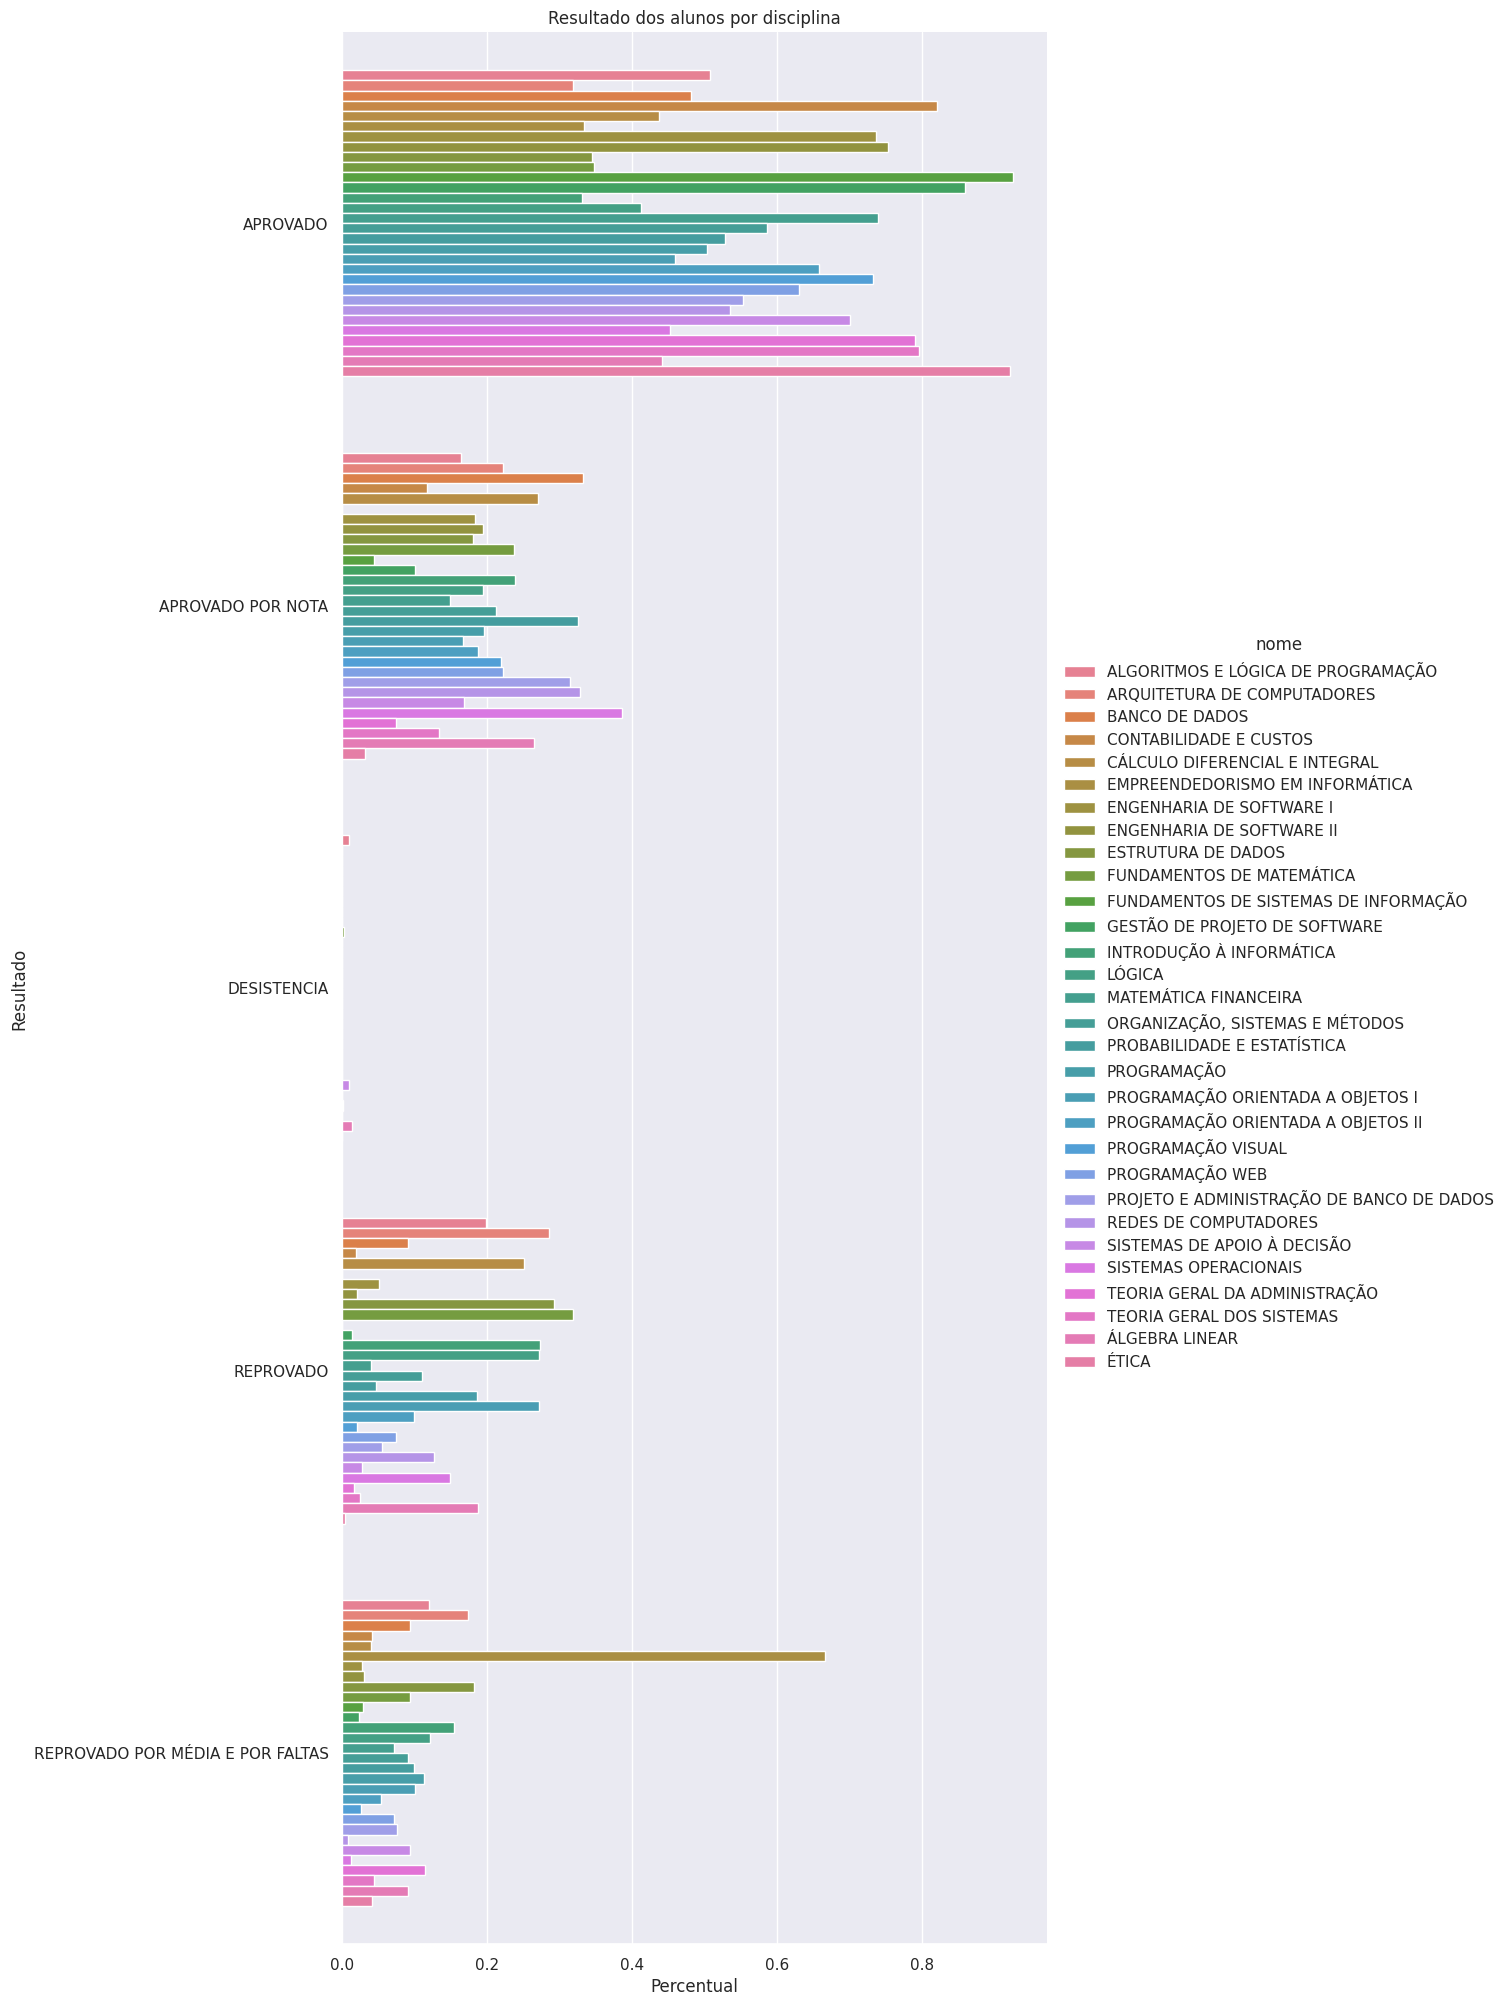

In [55]:
sns.set()
sns.catplot(x="percentual", y="descricao", hue="nome", kind="bar", data=dados_obrigatórias, legend=True, legend_out=True, height=20, aspect=0.6)
plt.xlabel("Percentual")
plt.ylabel("Resultado")
plt.title("Resultado dos alunos por disciplina")
plt.show()

In [56]:
tentativas_obrigatórias = df_dados_filtrado.groupby(["nome","discente"]).size()
tentativas_obrigatórias

nome                                discente                        
ALGORITMOS E LÓGICA DE PROGRAMAÇÃO  005c14d7c07bf7980b60c703f99c5ee7    1
                                    0107fd69d8cd7e3d30dede96fb68bfe5    2
                                    014789363f7940922e71e710ee9d22bc    1
                                    0168075add041f9eb4bba46d6fdb6387    1
                                    020d362ad9aecb1942935475f1dc5f10    1
                                                                       ..
ÉTICA                               f8fd7b4e62fd8f073b00c7f1d1a5c2ea    1
                                    fa07f8cf0fcb1601fbcc84300ebb111d    1
                                    fa7b20f8ac2312976cd7338487ad527d    1
                                    fb38dba740d0ed107efeebe85e77c84a    1
                                    fbe98ae2cc27fd7abdefa2eeced757c9    1
Length: 9658, dtype: int64

In [57]:
dados_tentativas = tentativas_obrigatórias.reset_index(name="tentativas")
dados_tentativas

,nome,discente,tentativas
0,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,005c14d7c07bf7980b60c703f99c5ee7,1
1,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,0107fd69d8cd7e3d30dede96fb68bfe5,2
2,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,014789363f7940922e71e710ee9d22bc,1
3,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,0168075add041f9eb4bba46d6fdb6387,1
4,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,020d362ad9aecb1942935475f1dc5f10,1
...,...,...,...
9653,ÉTICA,f8fd7b4e62fd8f073b00c7f1d1a5c2ea,1
9654,ÉTICA,fa07f8cf0fcb1601fbcc84300ebb111d,1
9655,ÉTICA,fa7b20f8ac2312976cd7338487ad527d,1
9656,ÉTICA,fb38dba740d0ed107efeebe85e77c84a,1


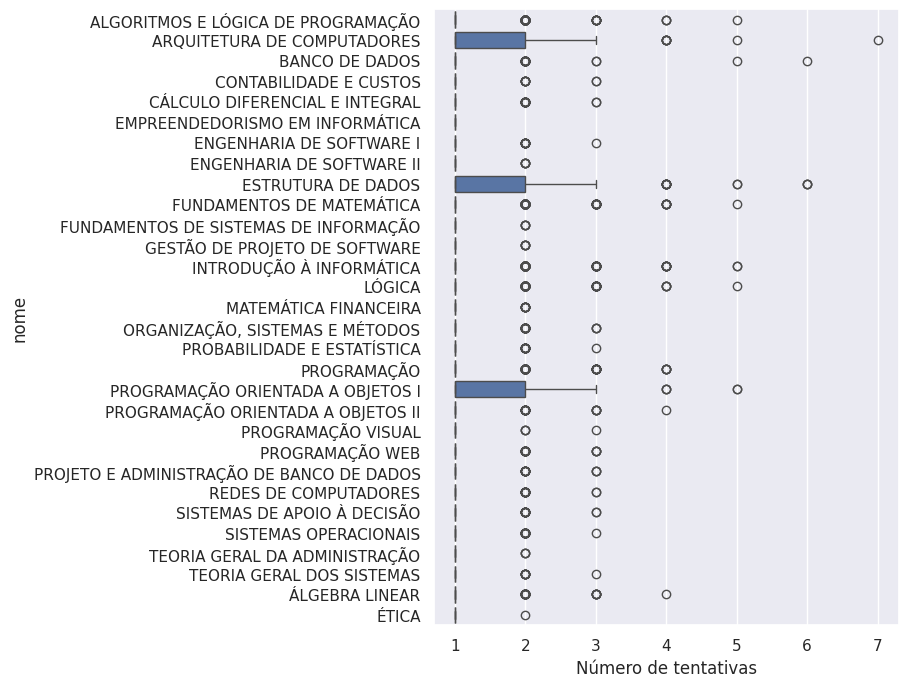

In [58]:
plt.figure(figsize=(6,8))
sns.boxplot(x="tentativas", y="nome", data=dados_tentativas)
plt.xlabel("Número de tentativas")
plt.show()

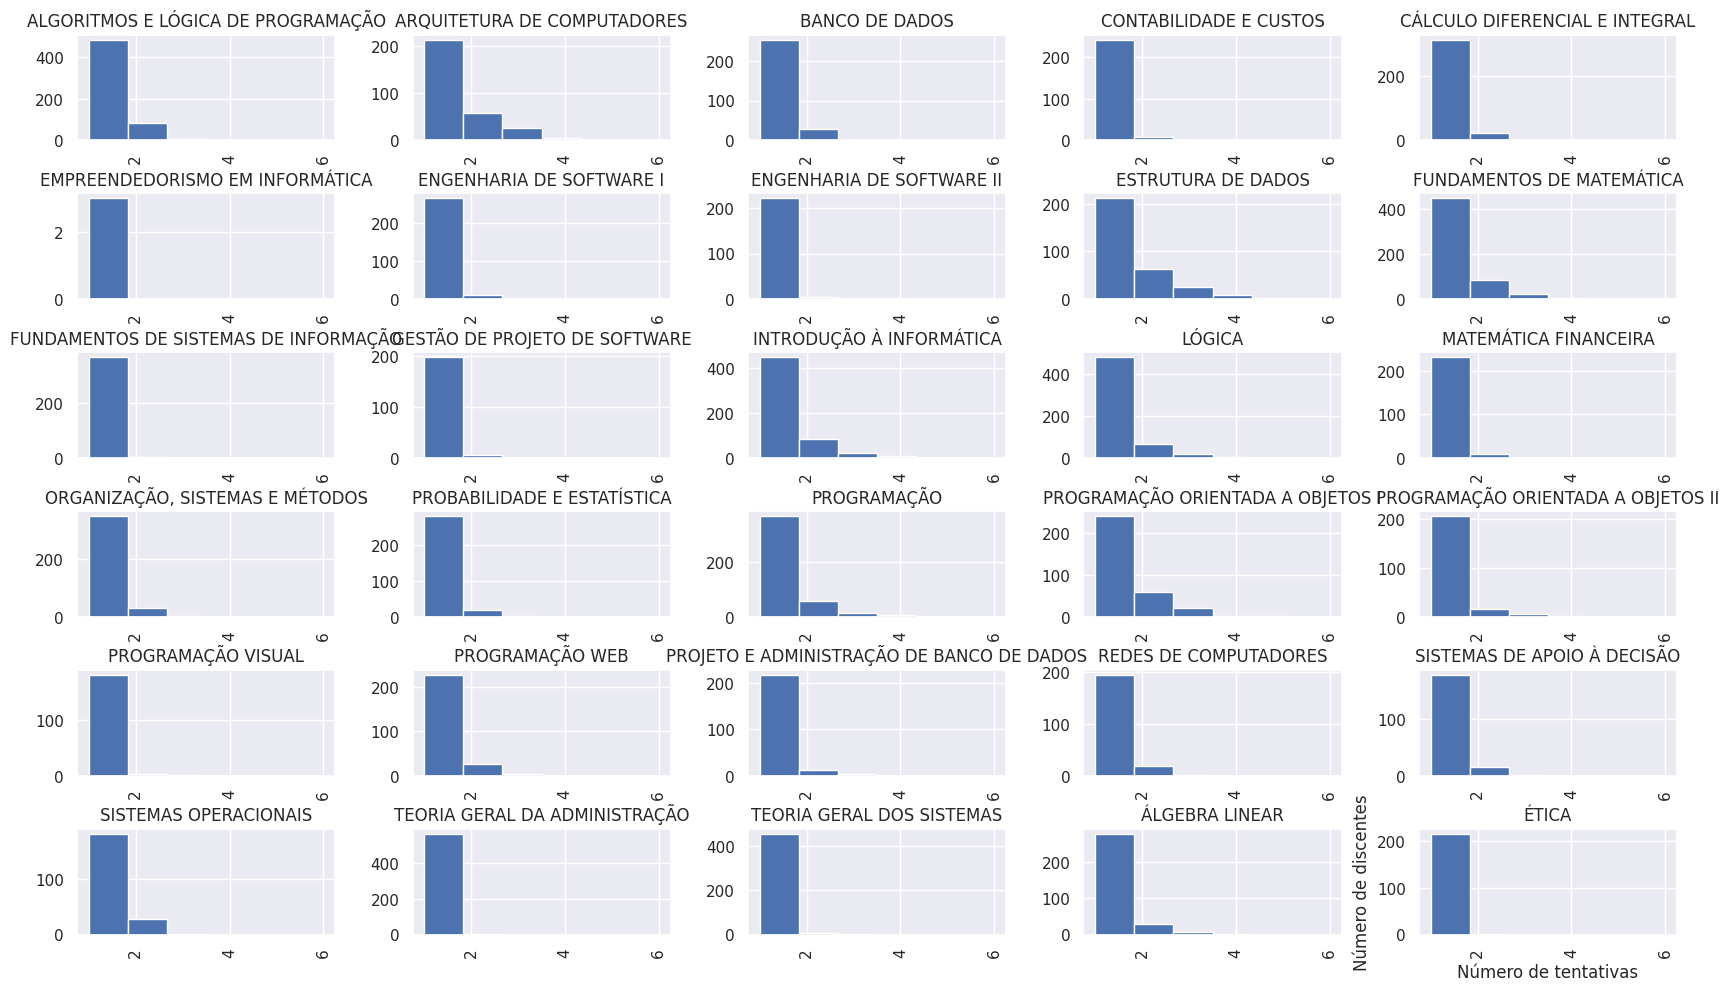

In [59]:
dados_tentativas.hist(by="nome", column="tentativas", figsize=(20,12), bins=6, range=(1,6))
plt.xlabel("Número de tentativas")
plt.ylabel("Número de discentes")
plt.show()

Agrupando os dados e deixando ordenado pela coluna discente.

In [60]:
agregado_obrigatórias = df_dados_filtrado .groupby(["discente","nome","ano","descricao"]).size()
df_dados_filtrado = df_dados_filtrado.sort_values(by='discente')
df_dados_filtrado

,discente,unidade,media_final,descricao,ano,id_componente,nome,sexo,ano_nascimento,ano_ingresso,status
33638,005c14d7c07bf7980b60c703f99c5ee7,1.0,"8,7",APROVADO,20181,62490,TEORIA GERAL DA ADMINISTRAÇÃO,M,1998,2018,CANCELADO
41282,005c14d7c07bf7980b60c703f99c5ee7,1.0,"5,0",APROVADO POR NOTA,20202,62712,PROBABILIDADE E ESTATÍSTICA,M,1998,2018,CANCELADO
34392,005c14d7c07bf7980b60c703f99c5ee7,1.0,"0,8",REPROVADO,20181,62488,FUNDAMENTOS DE MATEMÁTICA,M,1998,2018,CANCELADO
46398,005c14d7c07bf7980b60c703f99c5ee7,1.0,"6,8",APROVADO POR NOTA,20211,62758,PROGRAMAÇÃO ORIENTADA A OBJETOS II,M,1998,2018,CANCELADO
46449,005c14d7c07bf7980b60c703f99c5ee7,1.0,"7,5",APROVADO,20211,62762,SISTEMAS OPERACIONAIS,M,1998,2018,CANCELADO
...,...,...,...,...,...,...,...,...,...,...,...
30522,ff56f2c5048dae0797fd3e851572b80c,1.0,"5,7",APROVADO POR NOTA,20171,62762,SISTEMAS OPERACIONAIS,M,1995,2014,CONCLUÍDO
28311,ff56f2c5048dae0797fd3e851572b80c,1.0,"1,8",REPROVADO,20162,62748,PROGRAMAÇÃO,M,1995,2014,CONCLUÍDO
9666,ffe447b2fe2058d45d5f756349a26f45,1.0,"0,0",REPROVADO POR MÉDIA E POR FALTAS,20121,2037004,TEORIA GERAL DA ADMINISTRAÇÃO,M,1988,2012,CANCELADO
8359,ffe447b2fe2058d45d5f756349a26f45,1.0,"0,0",REPROVADO POR MÉDIA E POR FALTAS,20121,2037000,ALGORITMOS E LÓGICA DE PROGRAMAÇÃO,M,1988,2012,CANCELADO


In [61]:
df_dados_filtrado['media_final'] = df_dados_filtrado['media_final'].str.replace(',', '.').astype(float)

In [62]:
# Contar o número de reprovações (notas abaixo de 6.0)
reprovacoes_por_aluno = df_dados_filtrado[df_dados_filtrado['status'] == 'CANCELADO'].groupby('discente').size()
num_reprovacoes = len(reprovacoes_por_aluno)
num_reprovacoes

373